In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
european_genomes = pd.read_csv(
    'european_genomes_269.csv')
african_genomes = pd.read_csv(
    'african_genomes_269.csv')
hispanic_genomes = pd.read_csv(
    'hispanic_genomes_269.csv')
east_asain_genomes = pd.read_csv(
    'East_Asian_genomes_269.csv')

In [8]:
logodds = pd.read_csv('log_odds.csv')
allele_list = logodds['rs'].to_list()

In [9]:
logodds.head()

,rs,odds_ratio,log_odds
0,rs7542260,1.00,0.000000
1,rs2847344,1.04,0.017451
2,rs10803412,1.05,0.022428
3,rs544780844,1.07,0.027350
4,rs56391074,1.05,0.019116


In [10]:
df_euro = european_genomes.copy()
df_afro = african_genomes.copy()
df_hisp = hispanic_genomes.copy()
df_ea = east_asain_genomes.copy()

In [11]:
me_dict = dict(zip(logodds.rs, logodds.log_odds))

In [12]:
def get_distro(df, dictionary):
    for column in df:
        df[column] = df[column].apply(lambda x: x * dictionary.get(column))
    df['PRS'] = df.sum(axis = 1)
    return df['PRS'].to_list()

In [13]:
PRS_distro_euro = get_distro(df_euro, me_dict)
PRS_distro_afro = get_distro(df_afro, me_dict)
PRS_distro_hisp = get_distro(df_hisp, me_dict)
PRS_distro_ea = get_distro(df_ea, me_dict)

In [14]:
percentiles = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99]
PRS_euro_percentiles = list(np.percentile(PRS_distro_euro, percentiles))
PRS_afro_percentiles = list(np.percentile(PRS_distro_afro, percentiles))
PRS_hisp_percentiles = list(np.percentile(PRS_distro_hisp, percentiles))
PRS_ea_percentiles = list(np.percentile(PRS_distro_ea, percentiles))

In [15]:
PRS_Distro_df = pd.DataFrame({'Percentile': percentiles, 'European': PRS_euro_percentiles, 'African':PRS_afro_percentiles, 'Hispanic': PRS_hisp_percentiles, 'East Asian': PRS_ea_percentiles})

In [16]:
PRS_Distro_df

,Percentile,European,African,Hispanic,East Asian
0,1,4.451408,4.613447,4.499788,4.410374
1,10,4.628725,4.774096,4.660027,4.570014
2,20,4.700839,4.844392,4.731384,4.637034
3,30,4.753597,4.894344,4.780811,4.685872
4,40,4.798667,4.937409,4.822881,4.727078
5,50,4.838803,4.979492,4.863300,4.764449
6,60,4.880083,5.021143,4.904354,4.802161
7,70,4.924475,5.066605,4.947256,4.843787
8,80,4.977982,5.118124,4.997989,4.891494
9,90,5.051459,5.193068,5.068276,4.956232


In [17]:
PRS_Distro_df.to_csv('PRS_distribution.csv')

In [18]:
PRS_Distro_df_melted = PRS_Distro_df.melt(id_vars = ['Percentile'])

In [19]:
PRS_Distro_df_melted

,Percentile,variable,value
0,1,European,4.451408
1,10,European,4.628725
2,20,European,4.700839
3,30,European,4.753597
4,40,European,4.798667
5,50,European,4.838803
6,60,European,4.880083
7,70,European,4.924475
8,80,European,4.977982
9,90,European,5.051459


In [20]:
PRS_Distro_df_melted['logvalue'] = PRS_Distro_df_melted['value'].apply(lambda x: np.log(x))

<AxesSubplot:xlabel='value', ylabel='Percentile'>

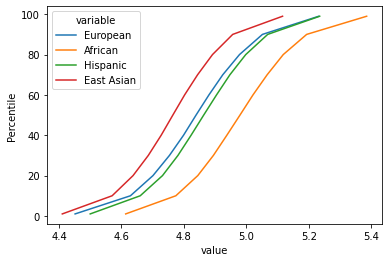

In [21]:
sns.lineplot(data = PRS_Distro_df_melted, y = 'Percentile', x = 'value', hue= 'variable')